<a href="https://colab.research.google.com/github/nancymary-web/Project1/blob/master/2_ANN_on_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
df = pd.read_pickle("/content/2_CarPricesData.pkl")

In [17]:
import pandas as pd
df = pd.read_pickle("/content/2_CarPricesData.pkl")

In [18]:
df

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,23.0,46986,1165.0,90,1,2000.0,3,13500
1,23.0,72937,1165.0,90,1,2000.0,3,13750
2,24.0,41711,1165.0,90,1,2000.0,3,13950
3,26.0,48000,1165.0,90,0,2000.0,3,14950
4,30.0,38500,1170.0,90,0,2000.0,3,13750
...,...,...,...,...,...,...,...,...
1431,69.0,20544,1025.0,86,1,1300.0,3,7500
1432,72.0,19000,1015.0,86,0,1300.0,3,10845
1433,71.0,17016,1015.0,86,0,1300.0,3,8500
1434,70.0,16916,1015.0,86,1,1300.0,3,7250


In [19]:
df.isnull().sum()

,0
Age,0
KM,0
Weight,0
HP,0
MetColor,0
CC,0
Doors,0
Price,0


In [20]:
df.groupby("Doors")['Weight'].max()

,Weight
Doors,
2,1115.0
3,1320.0
4,1160.0
5,1320.0


In [21]:
df.columns

Index(['Age', 'KM', 'Weight', 'HP', 'MetColor', 'CC', 'Doors', 'Price'], dtype='object')

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df[['Age', 'KM', 'Weight', 'HP', 'CC']] = sc.fit_transform(df[['Age', 'KM', 'Weight', 'HP', 'CC']])
df.head()

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
0,0.278481,0.193355,0.515625,0.170732,1,1.0,3,13500
1,0.278481,0.300149,0.515625,0.170732,1,1.0,3,13750
2,0.291139,0.171647,0.515625,0.170732,1,1.0,3,13950
3,0.316456,0.197528,0.515625,0.170732,0,1.0,3,14950
4,0.367089,0.158433,0.531250,0.170732,0,1.0,3,13750


<Axes: xlabel='Age'>

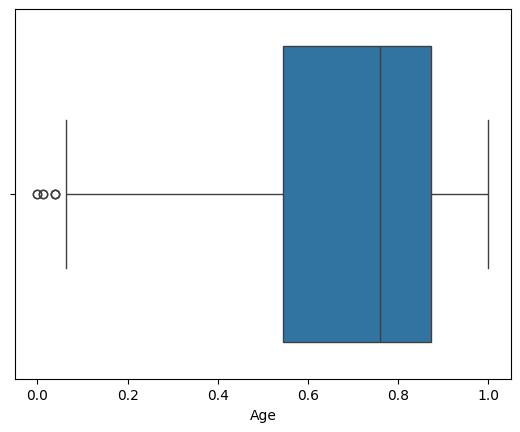

In [23]:
# Handling outliers
# Task

import seaborn as sns

sns.boxplot(x='Age',data=df)

In [24]:
# Spiting data
X = df.iloc[:,:-1]
y = df['Price']

In [27]:
X.shape

(1435, 7)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)


In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1076, 7)
(359, 7)
(1076,)
(359,)


In [30]:
1076/20

53.8

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1435 non-null   float64
 1   KM        1435 non-null   float64
 2   Weight    1435 non-null   float64
 3   HP        1435 non-null   float64
 4   MetColor  1435 non-null   int64  
 5   CC        1435 non-null   float64
 6   Doors     1435 non-null   int64  
 7   Price     1435 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 100.9 KB


In [32]:
df['Price'] = df['Price'].astype('float32')

In [33]:
y_train = y_train.astype('float32')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1435 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1435 non-null   float64
 1   KM        1435 non-null   float64
 2   Weight    1435 non-null   float64
 3   HP        1435 non-null   float64
 4   MetColor  1435 non-null   int64  
 5   CC        1435 non-null   float64
 6   Doors     1435 non-null   int64  
 7   Price     1435 non-null   float32
dtypes: float32(1), float64(5), int64(2)
memory usage: 95.3 KB


In [35]:
pip install keras

In [ ]:
pip install tensorflow

   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.2/390.3 MB 5.9 MB/s eta 0:01:06
   ---------------------------------------- 0.3/390.3 MB 6.5 MB/s eta 0:01:00
   ---------------------------------------- 0.6/390.3 MB 5.2 MB/s eta 0:01:15
   ---------------------------------------- 0.7/390.3 MB 4.3 MB/s eta 0:01:31
   ---------------------------------------- 0.9/390.3 MB 4.2 MB/s eta 0:01:34
   ---------------------------------------- 1.6/390.3 MB 6.0 MB/s eta 0:01:05
   ---------------------------------------- 2.3/390.3 MB 7.3 MB/s eta 0:00:54
   ---------------------------------------- 3.5/390.3 MB 9.8 MB/s eta 0:00:40
   ---------------------------------------- 4.4/390.3 MB 10.8 MB/s eta 0:00:36
    --------------------------------------- 5.4/390.3 MB 11.8 MB/s eta 0:00:33
    --------------------------------------- 6.3/390.3 MB 12.7 MB/s eta 0:00:31
    --------------------------------------- 7.8/390.3 MB 14.2 MB/s e

In [36]:
# Model building
from keras import Sequential
from keras.layers import Dense
import tensorflow as tf
from sklearn.metrics import r2_score

In [ ]:
model = Sequential()
model.add(Dense(units=16,input_dim=7,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units = 32,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=64,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(units=1,kernel_initializer='he_uniform'))

model.compile(loss='mean_squared_error',optimizer='adam', metrics=[tf.keras.metrics.R2Score()])
model.fit(x_train,y_train,batch_size=20,epochs=10,verbose=1)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 125900560.0000 - r2_score: -9.1262
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 125147568.0000 - r2_score: -8.8781
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 122125272.0000 - r2_score: -9.4217
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 110779024.0000 - r2_score: -7.3119 
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 78759056.0000 - r2_score: -4.7073
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38778316.0000 - r2_score: -2.0876
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18112520.0000 - r2_score: -0.3415
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14712679.0000 - r2_score: -0.2016
Epoch 9/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15167222.0000 - r2_score: -0.1838
Epoch 10/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15444674.0000 - r2_score: -0.1168


In [ ]:
# Do EDA and domain analysis
# Check if you have outliers
# Try other scaling option
# Increase the hidden layers
# train for more epochs---- 100

In [ ]:
y_test = y_test.astype("float32")

In [ ]:
model.evaluate(x_test,y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12126837.0000 - r2_score: -0.0752 


[13801600.0, -0.054132819175720215]